In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import scipy.io
from scipy.spatial import distance
%matplotlib inline


In [2]:
PATH=r"C:\Users\Jack\Desktop\Computational Data Analysis\Module 3\homework3-5\homework3\data\isomap.mat"

In [3]:
df = scipy.io.loadmat(PATH)

In [4]:
arr = np.array(df['images'])

In [5]:
flat_imgs = arr.T
flat_imgs.shape

(698, 4096)

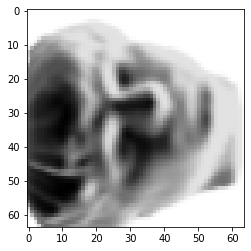

In [6]:
##Visualizing a couple of images
dim =(64,64)
img = np.reshape(flat_imgs[600], dim)
plt.imshow(img, cmap ='Greys')

In [7]:
from scipy.spatial.distance import pdist, cdist


In [29]:
def pairwise_distance(X, metrics=['euclidean', 'manhattan']):
    if metrics =='euclidean':
        pairwise_distance = cdist(X, X, 'euclidean')
    if metrics =='manhattan':
        pairwise_distance =cdist(X,X, 'cityblock')
    return pairwise_distance

In [10]:
pairwise_distance = cdist(flat_imgs, flat_imgs, 'cityblock')


1901.1951593137305

In [11]:
pairwise_distance.min()

0.0

In [13]:
def adjacency_matrix(X, epsilon):
    A = np.zeros((len(X), len(X)))
    for i in range(len(X)):
        for j in range(len(X)):
            if X[i][j]<= epsilon:
                A[i][j]=X[i][j]
    return A

In [23]:
A = adjacency_matrix(pairwise_distance, epsilon = 1000)



In [24]:
np.savetxt('Adjacency matrix', A, delimiter =',')


In [25]:
import scipy

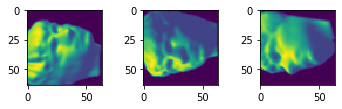

In [26]:
## Images that are not "connected by adjacency matrix with Image[0]"
dims =(64,64)
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
count =0
for i in [0, 1, 3]:
    count= count +1
    img = np.reshape(flat_imgs[i], dims)
    fig.add_subplot(rows, columns, count)
    plt.imshow(img)
plt.show()

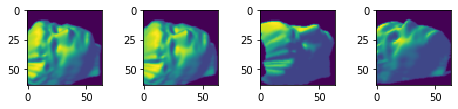

In [27]:
## Images that are not "connected by adjacency matrix with Image[0]"

dims =(64,64)
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
count = 0
for i in [0, 2, 4,9]:
    count = count +1
    img = np.reshape(flat_imgs[i], dims)
    fig.add_subplot(rows, columns, count)
    plt.imshow(img)
plt.show()

In [29]:
def pairwise_shortest_distance(distance_matrix, adjacency_matrix,epsilon):
    dim = len(distance_matrix)
    G=np.zeros((dim,dim))
    for i in range(dim):
        for j in range(dim):
            if adjacency_matrix[i][j] !=0:
                G[i][j]=adjacency_matrix[i][j]
            else:
                G[i][j]= np.max(distance_matrix)*100
    D = scipy.sparse.csgraph.shortest_path(G)
    return D

In [31]:
D = pairwise_shortest_distance(pairwise_distance, A, epsilon = 1000)


In [32]:
I = np.identity(len(flat_imgs))
H = I - 1/len(flat_imgs)*np.ones((len(flat_imgs), len(flat_imgs)))

In [33]:
D_sq = D**2

In [34]:
C = (1/(2*len(flat_imgs)))*np.dot(np.dot(H, D_sq), H)

In [35]:
""" Performing PCA"""


mu = np.mean(C, axis=0)

u_norm_data = C - mu


Cov = np.matmul(u_norm_data.T, u_norm_data) / u_norm_data.shape[0]
lambdas, eigen_vals = np.linalg.eigh(Cov)

eigen_vals = eigen_vals[:, np.argsort(-lambdas)]
lambdas = lambdas[np.argsort(-lambdas)]

principals = eigen_vals[:,0:2]
transformed_data = np.matmul(principals.T, u_norm_data.T).T / np.sqrt(lambdas[0:2])
transformed_features = np.matmul(u_norm_data, eigen_vals.T)


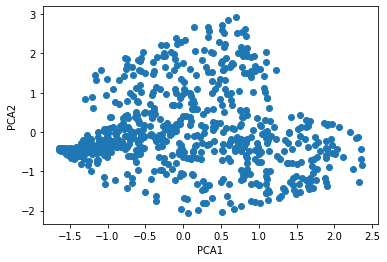

In [36]:
## Plotting transformed_data by PCA
plt.scatter(transformed_data[:,0], transformed_data[:, 1])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [37]:
"""In order to find out which imges is close to which, I calculate pairwise_distance between each transformed images"""
Image_similarity = cdist(transformed_data, transformed_data, 'cityblock')


In [40]:
Image_similarity

array([[0.        , 1.19063437, 0.38176911, ..., 2.20064572, 3.26815475,
        2.17414627],
       [1.19063437, 0.        , 1.57240348, ..., 1.01001135, 2.3333319 ,
        1.23932341],
       [0.38176911, 1.57240348, 0.        , ..., 2.58241483, 3.44989851,
        2.35589002],
       ...,
       [2.20064572, 1.01001135, 2.58241483, ..., 0.        , 3.30535808,
        1.39310745],
       [3.26815475, 2.3333319 , 3.44989851, ..., 3.30535808, 0.        ,
        1.91225063],
       [2.17414627, 1.23932341, 2.35589002, ..., 1.39310745, 1.91225063,
        0.        ]])

In [44]:
list0_similarity =[]

for i in range(len(Image_similarity[0])):
    if Image_similarity[0][i]<2:
        list0_similarity.append(i)
    

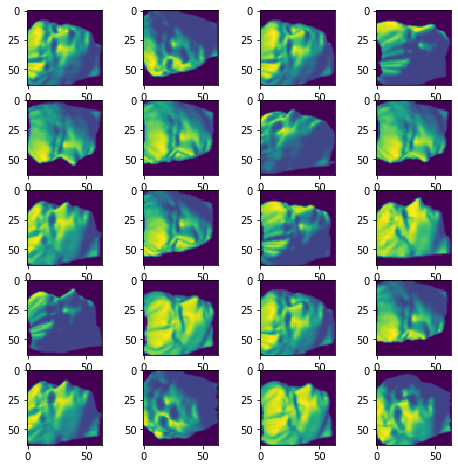

In [45]:
" Ploting Images similar to Image 0"
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
count= 0
for i in list0_similarity[:20]:
    count =count+1
    img = np.reshape(flat_imgs[i],dims)
    fig.add_subplot(rows, columns, count)
    plt.imshow(img)
plt.show()

